# Auto Sklearn Example

Auto-Sklearn installation link: https://automl.github.io/auto-sklearn/stable/installation.html

In [4]:
%matplotlib inline
import os
import sys
import pandas as pd
import sklearn as skl
import sklearn.datasets
import numpy as np
import autosklearn
import autosklearn.classification as askl_class
import autosklearn.regression as askl_reg
import matplotlib.pyplot as plt
import joblib
plt.rcParams['figure.figsize'] = (17.0, 6)

# Import dataset

In [2]:
data = sklearn.datasets.load_breast_cancer(return_X_y=False)
#X_df = pd.DataFrame(X)
X_df = pd.DataFrame(data['data'])
y_df = pd.DataFrame(data['target'])

X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(X_df, y_df)

# Set Auto-sklearn Parameters

In [48]:
model_name = 'dublin_data_examle'
model_runtime = 2400
model_t_per_run = 60
cv_folds = 5

# Train and save the Model

In [95]:
# GENERIC CLASSIFICATION MODEL
model = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=model_runtime, 
                                                         per_run_time_limit = model_t_per_run,
                                                         resampling_strategy = 'cv', 
                                                         resampling_strategy_arguments = {'folds':cv_folds})



# FIT MODEL
model.fit(X_train, y_train.values.ravel(), dataset_name = model_name + '_fit' )
print ("\n")
print ("Finished Training Classifier!!")

# REFIT MODEL
model.refit(X_train, y_train.values.ravel())
print ("\n")
print ("Finished refitting model!!")

# SAVE MODEL
import os, joblib
filename = model_name + '.pkl'
joblib.dump(model, filename)  
#pickle.dump(model, open(model_run_path + '/' + model_name, 'wb'))
print ("\n")
print ("Model has been saved")`

[WARNING] [2017-08-11 23:03:48,254:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-08-11 23:03:48,254:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run2
You are already timing task: index_run4


[WARNING] [2017-08-11 23:06:19,270:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-08-11 23:06:19,270:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run6
You are already timing task: index_run6
You are already timing task: index_run6
You are already timing task: index_run6
You are already timing task: index_run6
You are already timing task: index_run6
You are already timing task: index_run6
You are already timing task: index_run6
You are already timing task: index_run6
You are already timing task: index_run6
You are already timing task: index_run6
You are already timing task: index_run6
You are already timing task: index_run6
You are already timing task: index_run6
You are already timing task: index_run6
You are already timing task: index_run6
You are already timing task: index_run7
You are already timing task: index_run7
You are already timing task: index_run8




Finished Training Classifier!!


Finished refitting model!!


Model has been saved


In [7]:
#model = joblib.load(model_name + '.pkl')

In [11]:
print(model.show_models())

[(0.260000, SimpleClassificationPipeline({'imputation:strategy': 'mean', 'preprocessor:select_rates:mode': 'fwe', 'classifier:libsvm_svc:tol': 1.6147607485887653e-05, 'balancing:strategy': 'weighting', 'preprocessor:select_rates:alpha': 0.19623953814305067, 'preprocessor:__choice__': 'select_rates', 'classifier:libsvm_svc:C': 13677.935413986388, 'classifier:libsvm_svc:kernel': 'rbf', 'rescaling:__choice__': 'minmax', 'classifier:libsvm_svc:max_iter': -1, 'one_hot_encoding:use_minimum_fraction': 'False', 'classifier:libsvm_svc:gamma': 0.00015939552183341207, 'classifier:libsvm_svc:shrinking': 'True', 'classifier:__choice__': 'libsvm_svc', 'preprocessor:select_rates:score_func': 'f_classif'},
dataset_properties={
  'sparse': False,
  'multiclass': False,
  'signed': False,
  'multilabel': False,
  'target_type': 'classification',
  'task': 1})),
(0.240000, SimpleClassificationPipeline({'imputation:strategy': 'most_frequent', 'preprocessor:fast_ica:whiten': 'False', 'classifier:random_for

In [ ]:
# model.fit_ensemble(y_train, task=None, metric=None, precision='32', 
#                    dataset_name=None, ensemble_nbest=15, ensemble_size=None)

# Find the winning model

In [52]:
# FIND AND SAVE ALL MODEL CV RESULTS
model_cv_results = pd.DataFrame.from_dict(model.cv_results_)
model_cv_results.sort_values('rank_test_scores', ascending=True, inplace=True)
model_cv_results.to_csv(model_name + '_cv_results.csv', sep = ',')
print ('Model CV Results have been saved')
print ('\n')

# DISPLAY WINNING MODEL OUTPUT HYPERPARAMETERS
winning_params = model_cv_results['params'][model_cv_results['rank_test_scores'] == 1]
print ('The winning model hyperparameters are:')
for w in winning_params.to_dict():
    print (w)
print ('\n')

# MAKE PREDICTIONS AND SAVE
model_predictions = model.predict(X_test)
np.savetxt(model_name + '_predictions.csv', model_predictions, delimiter=",")
print ('Model has made predictions which have been saved')

Model CV Results have been saved


The winning model hyperparameters are:
14


Model has made predictions which have been saved


# Examine Auto-sklearn results

In [3]:
model_cv_results = pd.read_csv('C:/Users/mmcguire/ML/git/data_learning_old/dublin_data_examle _cv_results.csv')
model_cv_results.head(5)

,Unnamed: 0,mean_fit_time,mean_test_score,param_balancing:strategy,param_classifier:__choice__,param_classifier:adaboost:algorithm,param_classifier:adaboost:learning_rate,param_classifier:adaboost:max_depth,param_classifier:adaboost:n_estimators,param_classifier:bernoulli_nb:alpha,...,param_preprocessor:random_trees_embedding:n_estimators,param_preprocessor:select_percentile_classification:percentile,param_preprocessor:select_percentile_classification:score_func,param_preprocessor:select_rates:alpha,param_preprocessor:select_rates:mode,param_preprocessor:select_rates:score_func,param_rescaling:__choice__,params,rank_test_scores,status
0,14,27.240330,0.971831,weighting,gradient_boosting,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,none,{'one_hot_encoding:minimum_fraction': 0.009853...,1,Unknown
1,3,10.179996,0.964789,none,libsvm_svc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.19624,fwe,f_classif,minmax,{'classifier:libsvm_svc:tol': 1.61476074858876...,2,Unknown
2,23,26.230120,0.962441,weighting,gradient_boosting,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,normalize,{'one_hot_encoding:minimum_fraction': 0.009853...,3,Unknown
3,17,38.319626,0.962441,weighting,gradient_boosting,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.10000,fpr,chi2,minmax,"{'classifier:gradient_boosting:max_depth': 8, ...",3,Unknown
4,2,38.795524,0.960094,none,gradient_boosting,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,minmax,{'one_hot_encoding:minimum_fraction': 0.002694...,5,Unknown


# Print top 15 algorithms

In [164]:
model_cv_results[['rank_test_scores', 'param_classifier:__choice__']].head(15)

,rank_test_scores,param_classifier:__choice__
14,1,gradient_boosting
3,2,libsvm_svc
23,3,gradient_boosting
17,3,gradient_boosting
2,5,gradient_boosting
31,5,gradient_boosting
8,5,random_forest
33,8,gradient_boosting
21,8,gradient_boosting
19,8,gradient_boosting


# Plot algorithm rankings

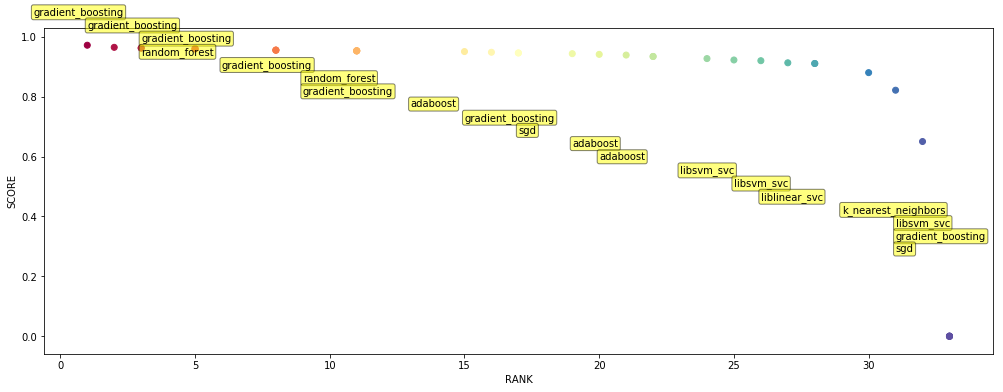

In [141]:
# Assign x, y coordinates
x = model_cv_results['rank_test_scores'].values
y = model_cv_results['mean_test_score'].values
label = []
index = []
arrow_lst = []

# Create label list
for i,lb in enumerate(model_cv_results['param_classifier:__choice__'].values):
    if i % 2 == 0:
        label.append(lb)
        arrow_lst.append('')
        #arrow_lst.append(dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    else:
        label.append('')
        #arrow_lst.append(dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        arrow_lst.append('')
    index.append(i)  

# Plot scores
plt.scatter(
    x, y, marker='o', c=x,
    cmap=plt.get_cmap('Spectral'))
plt.xlabel('RANK')
plt.ylabel('SCORE') 

# Annote plot points
d = 1.1
for i, lb, x_p, y_p in (zip(index, label, x, y)):
    plt.annotate(
        lb,
        xy=(x_p, y_p), xytext=(x_p-2, d),
        textcoords='data', ha='left', va='top',
        bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5),
        arrowprops=arrow_lst[i]
        )
    d = d - 0.022

plt.show()

# Print winning model parameters

In [163]:
model_cv_results['params'].iloc[0]

{'balancing:strategy': 'weighting',
 'classifier:__choice__': 'gradient_boosting',
 'classifier:gradient_boosting:learning_rate': 0.13770674588914472,
 'classifier:gradient_boosting:loss': 'deviance',
 'classifier:gradient_boosting:max_depth': 4,
 'classifier:gradient_boosting:max_features': 1.4662630880288958,
 'classifier:gradient_boosting:max_leaf_nodes': 'None',
 'classifier:gradient_boosting:min_samples_leaf': 2,
 'classifier:gradient_boosting:min_samples_split': 12,
 'classifier:gradient_boosting:min_weight_fraction_leaf': 0.0,
 'classifier:gradient_boosting:n_estimators': 341,
 'classifier:gradient_boosting:subsample': 0.678503955199761,
 'imputation:strategy': 'mean',
 'one_hot_encoding:minimum_fraction': 0.00985371350719694,
 'one_hot_encoding:use_minimum_fraction': 'True',
 'preprocessor:__choice__': 'feature_agglomeration',
 'preprocessor:feature_agglomeration:affinity': 'euclidean',
 'preprocessor:feature_agglomeration:linkage': 'average',
 'preprocessor:feature_agglomerati

In [162]:
model_cv_results['params'].iloc[1]

{'balancing:strategy': 'none',
 'classifier:__choice__': 'libsvm_svc',
 'classifier:libsvm_svc:C': 13677.935413986388,
 'classifier:libsvm_svc:gamma': 0.00015939552183341207,
 'classifier:libsvm_svc:kernel': 'rbf',
 'classifier:libsvm_svc:max_iter': -1,
 'classifier:libsvm_svc:shrinking': 'True',
 'classifier:libsvm_svc:tol': 1.6147607485887653e-05,
 'imputation:strategy': 'mean',
 'one_hot_encoding:use_minimum_fraction': 'False',
 'preprocessor:__choice__': 'select_rates',
 'preprocessor:select_rates:alpha': 0.19623953814305067,
 'preprocessor:select_rates:mode': 'fwe',
 'preprocessor:select_rates:score_func': 'f_classif',
 'rescaling:__choice__': 'minmax'}